## Types of hypothesis test

- **T test**
    - continuous values attribute.
    - One sample T-test, Example - To test if there is a significant difference in population mean and sample mean.
    - Two sample T-test, Example - To test if there is a significant difference in two population attributes.
    
- **ANOVA(Analysis of variance) test**
    - One categorical attribute, one numerical attribute
    - Example - you want to check for each categorical variable, is there a change in continuous numerical attribute.
    
- **Chi square test**
    - It's used when data is categorical and works on principle of likelyhood.
    - Example - testing whether the categorical attribute has correlation with categorical target.

### lets create some dataset

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
# df=sns.load_dataset('tips')

### One sample T- test

- Suppose we have BE college with 32 students, and I say CS branch students are youngest than all other branches.
    - Here my alternative hypothesis is CS branch students are youngest
    - My Null hypothesis is that, all students are of equal ages or there is no such alternative hypothesis.

In [114]:
ages = [10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
population_mean = np.mean(ages)

# lets take a mean of CS branch students
sample = np.random.choice(ages, 10)
sample_mean = sample.mean()

print(population_mean, sample_mean)

30.34375 34.3


In [115]:
ttest, p_value = sc.stats.ttest_1samp(population_mean, sample_mean)

In [117]:
# print(p_value)

In [118]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


### Two sample T-test
- suppose you want to donate money to poor people, and you want income range of people to decide to whom you should donate.
- And you tell two agencies to collect income range of people. And you have a doubt whether two groups have same pattern or not.
- In such scenario we can conduct two sample T-test
    - Null hypothesis - No majour difference in two groups of data
    - Alternate hypothesis - there is some doubt on these two sample data

In [185]:
np.random.seed(12)
group_a_income = sc.stats.poisson.rvs(loc=3000,mu=10000,size=60)
group_b_income = sc.stats.poisson.rvs(loc=3000,mu=14000,size=60)
print(group_a_income.mean(), group_b_income.mean())

12997.916666666666 16987.7


In [186]:
_, p_value = sc.stats.ttest_ind(a=group_a_income, b=group_b_income,equal_var=False)

In [187]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis because p_values is {}".format(p_value))
else:
    print("we are accepting null hypothesis because p_values is {}".format(p_value))

 we are rejecting null hypothesis because p_values is 4.471212473417163e-155


### ANOVA test (F-test)
- It tells whether two or more groups are similar or not based on their mean similarity and f-score.

#### 1. Example : 
#### null hypotheses, there is no significant change in tip values based on days
#### Alternative hypothesis, there is a change in tip values based on days

In [235]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [236]:
days = df['day'].unique()
days

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

<AxesSubplot:xlabel='day', ylabel='size'>

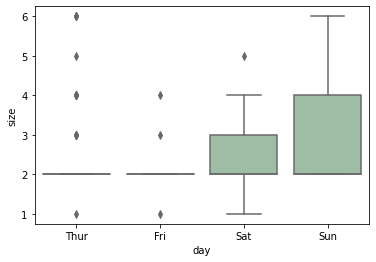

In [237]:
sns.boxplot(x='day', y='size', data=df, color='#99c2a2')

In [225]:
size_day = pd.crosstab(df['size'], df['day'])
size_day.loc['mean'] = size_day.mean()
size_day.style.background_gradient(cmap='Blues')

day,Thur,Fri,Sat,Sun
size,,,,
1,1.000000,1.000000,2.000000,0.000000
2,48.000000,16.000000,53.000000,39.000000
3,4.000000,1.000000,18.000000,15.000000
4,5.000000,1.000000,13.000000,18.000000
5,1.000000,0.000000,1.000000,3.000000
6,3.000000,0.000000,0.000000,1.000000
mean,10.333333,3.166667,14.500000,12.666667


In [233]:
F, p_value = sc.stats.f_oneway(df['tip'][df['day']=='Thur'].values,
                               df['tip'][df['day']=='Fri'].values,
                               df['tip'][df['day']=='Sat'].values,
                               df['tip'][df['day']=='Sun'].values)

In [234]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis because p_values is {}".format(p_value))
else:
    print("we are accepting null hypothesis because p_values is {}".format(p_value))

we are accepting null hypothesis because p_values is 0.1735885553040592


#### 2. Example :
#### null hypotheses, there is no significant change in size values based on days.
#### Alternative hypothesis, there is change in size values based on days.

<AxesSubplot:xlabel='day', ylabel='tip'>

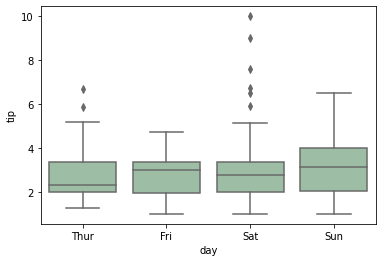

In [242]:
sns.boxplot(x='day', y='tip', data=df, color='#99c2a2')

In [243]:
tip_day = pd.crosstab(df['tip'].astype(int), df['day'])
tip_day.loc['mean'] = tip_day.mean()
tip_day.style.background_gradient(cmap='Blues')

day,Thur,Fri,Sat,Sun
tip,,,,
1,13.000000,5.000000,18.000000,9.000000
2,27.000000,4.000000,27.000000,20.000000
3,8.000000,7.000000,26.000000,27.000000
4,7.000000,3.000000,7.000000,8.000000
5,6.000000,0.000000,4.000000,10.000000
6,1.000000,0.000000,2.000000,2.000000
7,0.000000,0.000000,1.000000,0.000000
9,0.000000,0.000000,1.000000,0.000000
10,0.000000,0.000000,1.000000,0.000000


In [244]:
F, p_value = sc.stats.f_oneway(df['size'][df['day']=='Thur'].values,
                               df['size'][df['day']=='Fri'].values,
                               df['size'][df['day']=='Sat'].values,
                               df['size'][df['day']=='Sun'].values)

In [245]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis because p_values is {}".format(p_value))
else:
    print("we are accepting null hypothesis because p_values is {}".format(p_value))

 we are rejecting null hypothesis because p_values is 0.006840567173057235


### Chi square test
- It tells whether the two categorical attributes are correlated or not.

#### Example 1
#### Is there a relation bwtween gender and churned out come.
#### Null Hypothesis, there is no relation between gender and churned outcome.
#### Alternative Hypothesis, there is a relation between gender and churned outcome.

In [198]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')
df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


<AxesSubplot:xlabel='gender', ylabel='count'>

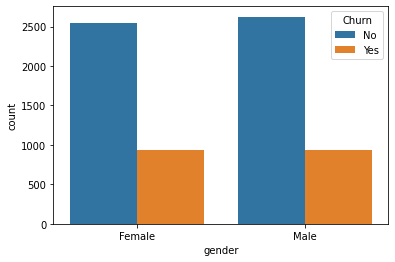

In [199]:
sns.countplot(x='gender', hue='Churn', data=df)

In [208]:
df_a = pd.crosstab(df['gender'], df['Churn'], margins=True)
df_a

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


In [220]:
chi2, p_value, dof, ex = sc.stats.chi2_contingency([df_a.iloc[0].values, df_a.iloc[1].values])

In [221]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis because p_values is {}".format(p_value))
else:
    print("we are accepting null hypothesis because p_values is {}".format(p_value))

we are accepting null hypothesis because p_values is 0.7701397772756198


#### Example 2
#### Is there a relation bwtween paperless billing and churned out come.
#### Null Hypothesis, there is no relation between paperless billing and churned outcome.
#### Alternative Hypothesis, there is a relation between paperless billing and churned outcome.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

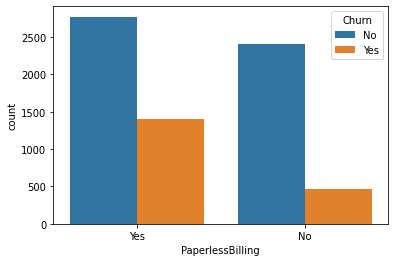

In [203]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)

In [213]:
df_b = pd.crosstab(df['PaperlessBilling'], df['Churn'], margins=True)
df_b_x = pd.crosstab(df['PaperlessBilling'], df['Churn'])
df_b

Churn,No,Yes,All
PaperlessBilling,,,
No,2403,469,2872
Yes,2771,1400,4171
All,5174,1869,7043


In [217]:
chi2, p_value, dof, ex = sc.stats.chi2_contingency([df_b_x.iloc[0].values, df_b_x.iloc[1].values])

In [218]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis because p_values is {}".format(p_value))
else:
    print("we are accepting null hypothesis because p_values is {}".format(p_value))

 we are rejecting null hypothesis because p_values is 4.073354668665985e-58
